In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def runge_kutta_3_ordem(f, x0, y0, h, n):
    print("\nMétodo de Runge-Kutta de 3ª Ordem\n")
    print(f"{'ITER.':<6}{'x0':<10}{'y0':<15}{'K1':<15}{'K2':<15}{'K3':<15}{'|yn - yn-1|':<15}")
    print("-" * 91)

    x_vals = [x0]
    y_vals = [y0]

    for i in range(n):
        x_atual = x_vals[-1]
        y_atual = y_vals[-1]

        k1 = f(x_atual, y_atual)
        k2 = f(x_atual + h/2, y_atual + h * k1 / 2)
        k3 = f(x_atual + h, y_atual - h * k1 + 2 * h * k2)

        y_next = y_atual + (h / 6) * (k1 + 4*k2 + k3)
        erro = '-' if i == 0 else abs(y_atual - y_vals[-2])

        print(f"{i:<6}{x_atual:<10.5f}{y_atual:<15.5f}"
              f"{k1:<15.5f}{k2:<15.5f}{k3:<15.5f}"
              f"{erro if erro == '-' else f'{erro:<15.5f}'}")

        x_vals.append(x_atual + h)
        y_vals.append(y_next)

    # Plot da solução e erro
    erros = [0] + [abs(y_vals[i] - y_vals[i-1]) for i in range(1, len(y_vals))]

    plt.figure(figsize=(12, 5))
    plt.plot(x_vals, y_vals, marker='o', label='y(x)')
    plt.plot(x_vals, erros, marker='x', linestyle='--', label='Erro |yᵢ - yᵢ₋₁|')
    plt.title('Solução e Erro - Método de Runge-Kutta de 3ª Ordem')
    plt.xlabel('x')
    plt.ylabel('y / erro')
    plt.legend()
    plt.grid(True)
    plt.show()

    return np.array(x_vals), np.array(y_vals)


Método de Runge-Kutta de 3ª Ordem

ITER. x0        y0             K1             K2             K3             |yn - yn-1|    
-------------------------------------------------------------------------------------------
0     1.00000   2.00000        4.00000        4.62000        5.55280        -
1     1.10000   2.46721        5.42787        6.29880        7.64205        0.46721        
2     1.20000   3.10496        7.45192        8.69390        10.65624       0.63775        
3     1.30000   3.98636        10.36454       12.16239       15.07068       0.88140        
4     1.40000   5.22111        14.61910       17.26098       21.63418       1.23475        
5     1.50000   6.97606        20.92818       24.86966       31.54295       1.75495        
6     1.60000   9.50856        30.42738       36.39875       46.73493       2.53250        
7     1.70000   13.22118       44.95201       54.14073       70.39484       3.71262        
8     1.80000   18.75301       67.51083       81.87563    

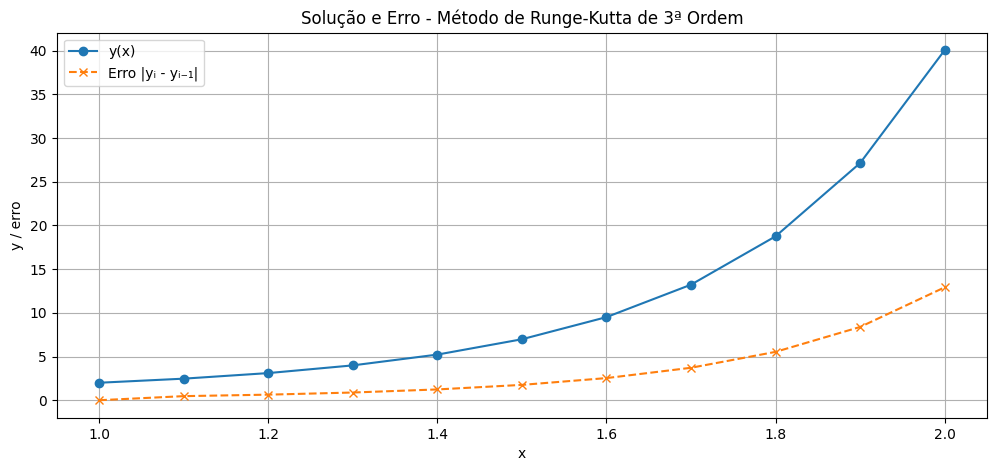

In [3]:
# Definição da função diferencial
f = lambda x, y: 2*x*y

# Condições iniciais
x0 = 1
y0 = 2
h = 0.1
n = 10

x_vals, y_vals = runge_kutta_3_ordem(f, x0, y0, h, n)